# 7 Amazing Open Source NLP Tools to Try With  Notebooks

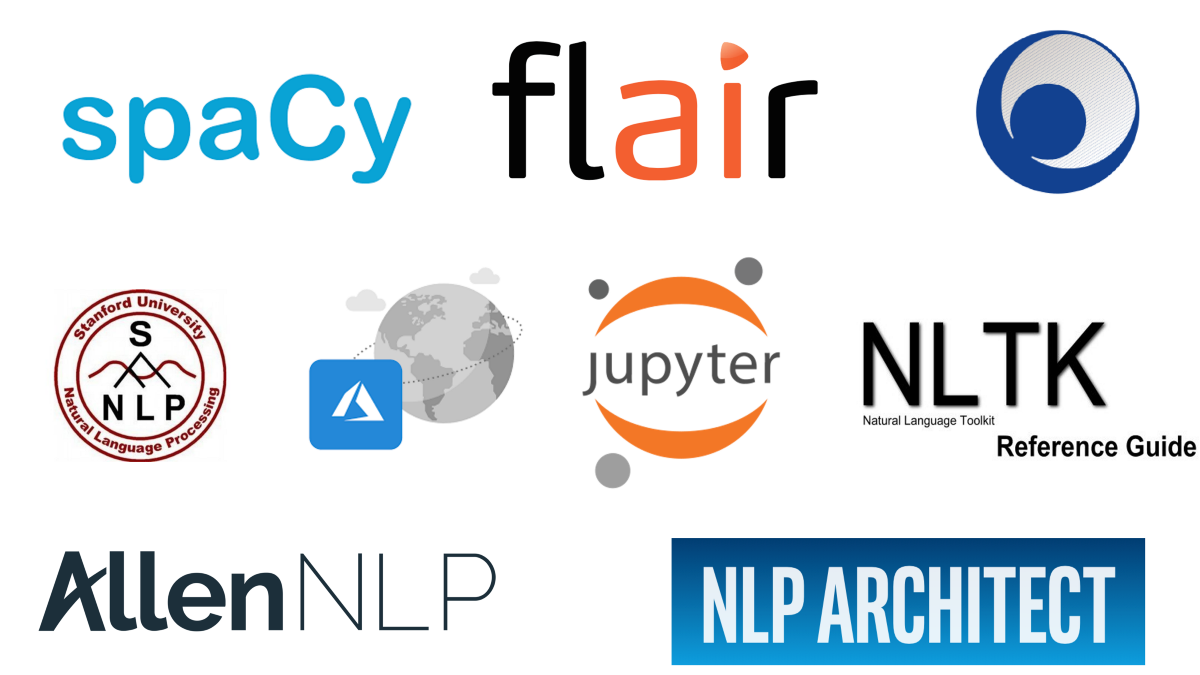

Here are my favorite NLP toolkits, you can start experimenting with them here in Azure Notebooks.

In [ ]:
import matplotlib
%matplotlib inline
from IPython.display import display

# 1. NLTK

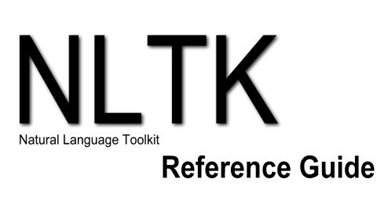

The Natural Language Toolkit - is a suite of open source Python modules, data sets, and tutorials supporting research and development in Natural Language Processing.

**Favorite Features:** Lexical Corpus Integration(WordNet, Stopwords, etc), Tokenization, Sentiment Analysis

## Tokenizer Demo

In [ ]:
import nltk
nltk.download('punkt')
sentence = """At eight o'clock on Thursday morning
              Arthur didn't feel very good."""
nltk.word_tokenize(sentence)

## WordNet Synsets Demo

In [ ]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
azure_synset = wn.synsets('azure')
[synset.lemma_names() for synset in azure_synset]

## Sentiment Analysis Demo 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

# 2. spaCy

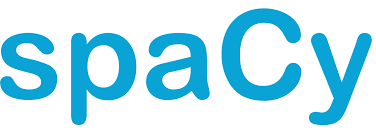

spaCy is a library for advanced Natural Language Processing in Python and Cython. spaCy comes with pre-trained statistical models and word vectors, and currently supports tokenization for 30+ languages.

**Favorite Features:** Syntactic Parser, Named Entity Recognition, Tokenization, Speed, Extensible Pipeline Interface, displacy visualization

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('en_core_web_sm')

# Process whole documents
text = (u"""Azure was announced in October 2008, started with codename "Project Red Dog", and released on February 1, 2010, as "Windows Azure" before being renamed "Microsoft Azure" on March 25, 2014.""")
doc = nlp(text)

###  Find named entities, phrases and concepts

In [ ]:
for ent in doc.ents:
    print(ent.text.strip(), ent.start_char, ent.end_char, ent.label_)

### Syntactic Tree Displacy Demo

In [ ]:
from spacy import displacy
from IPython.core.display import display, HTML
html = displacy.render(doc, style='dep')
display(HTML(html))

### Determine semantic similarities Demo

In [ ]:
doc1 = nlp(u"my fries were super gross")
doc2 = nlp(u"such disgusting fries")
similarity = doc1.similarity(doc2)
print(doc1.text, doc2.text, similarity)

# 3. AllenNLP

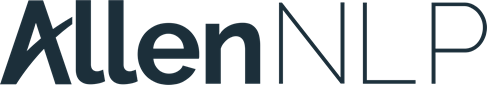

An Apache 2.0 NLP research library, built on PyTorch, for developing state-of-the-art deep learning models on a wide variety of linguistic tasks.

**Favorite Features:** Question and Answering, Semantic Role Labeling, Within Document Co-reference, Textual Entailment, Text to SQL

In [ ]:
!pip install allennlp

## Machine reading comprehension Q&A Demo

In [ ]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/bidaf-model-2017.09.15-charpad.tar.gz")
predictor.predict(
  passage="The Matrix is a 1999 science fiction action film written and directed by The Wachowskis, starring Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, and Joe Pantoliano.",
  question="Who stars in The Matrix?"
)['best_span_str']

## Semantic Role Labeling Demo

In [ ]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/srl-model-2018.05.25.tar.gz")
predictor.predict(
  sentence="Did Uriah honestly think he could beat the game in under three hours?"
)

## Textual Entailement (NLI) DEMO

In [ ]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/decomposable-attention-elmo-2018.02.19.tar.gz")
predictor.predict(
  hypothesis="Two women are sitting on a blanket near some rocks talking about politics.",
  premise="Two women are wandering along the shore drinking iced tea."
)

## Within Document Corefernce DEMO

In [ ]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/coref-model-2018.02.05.tar.gz")
predictor.predict(
  document="The woman reading a newspaper sat on the bench with her dog."
)

# 4. Stanford NLP

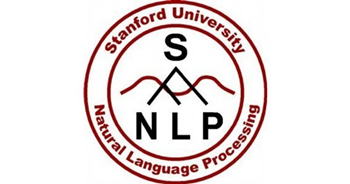

The Stanford NLP Group's official Python NLP library. It contains packages for running our latest fully neural pipeline from the CoNLL 2018 Shared Task and for accessing the Java Stanford CoreNLP server.

**Favorite Features:** Extensive Language Support for Tokenization, Parsing, Named Entity Extraction including Hebrew, Arabic, Finnish, Basque and more.

In [ ]:
!pip install stanfordnlp

### Hebrew Language Dependecy Parsing Demo 

In [ ]:
import stanfordnlp

In [ ]:
stanfordnlp.download('he',  resource_dir='/home/nbuser/library/')   # This downloads the hebrew models for the neural pipeline you can try a bunch of models here

In [ ]:
nlp = stanfordnlp.Pipeline(lang='he', models_dir='/home/nbuser/library/') # This sets up a default neural pipeline in hebrew 
doc = nlp("ארי אוהב עיבוד שפות")
doc.sentences[0].print_dependencies()

# 5. Intel NLP Architect

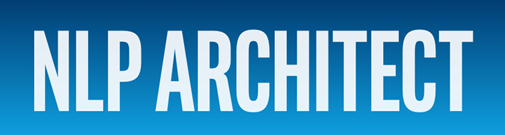

NLP Architect is an open-source Python library for exploring state-of-the-art deep learning topologies and techniques for natural language processing and natural language understanding. 

**Favorite Features:** Intent Extraction, Term Set Expansion, Machine Reading Comprehension, The only working python based Cross Document Co-Reference Sieve Based System.

In [ ]:
!export NLP_ARCHITECT_BE=CPU
!pip install nlp-architect

### Term Set Expansion Demo

In [ ]:
import wget
from nlp_architect.solutions.set_expansion.set_expand import SetExpand

url = 'http://nervana-modelzoo.s3.amazonaws.com/NLP/SetExp/enwiki-20171201_pretrained_set_expansion.txt'  
wget.download(url, 'enwiki-20171201_pretrained_set_expansion.txt')
se = SetExpand(np2vec_model_file='enwiki-20171201_pretrained_set_expansion.txt')
seed_str = 'San Francisco, Los Angeles'
seed_list = seed_str.strip().split(',')
se.expand(seed_list)

# 6. Flair
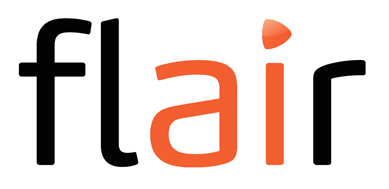

Flair allows you to apply our state-of-the-art natural language processing (NLP) models to your text, such as named entity recognition (NER), part-of-speech tagging (PoS), sense disambiguation and classification.

**Favorite Features:** Easy to use Pretrained BERT and Flair Embeddings

In [ ]:
!pip install flair

### BERT DEMO

In [ ]:
from flair.embeddings import BertEmbeddings

# init embedding
embedding = BertEmbeddings()

# create a sentence
sentence = Sentence('The grass is green .')

# embed words in sentence
embedding.embed(sentence)

### NER Demo

In [ ]:
from flair.data import Sentence
from flair.models import SequenceTagger

# make a sentence
sentence = Sentence('Azure was announced in October 2008, started with codename "Project Red Dog", and released on February 1, 2010, as "Windows Azure" before being renamed "Microsoft Azure" on March 25, 2014.')

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)
Done! The Sentence now has entity annotations. Print the sentence to see what the tagger found.

print(sentence)
print('The following NER tags are found:')

# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)

# 7. Gensim

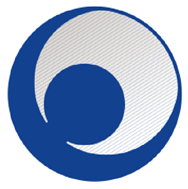


Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

**Favorite Features:** Topic Clustering, Favorite LDA implementation

In [ ]:
!pip install gensim

### [Topic Modeling Demo](https://nlpforhackers.io/topic-modeling/)

In [ ]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import brown

nltk.download('stopwords')
nltk.download('brown')

NUM_TOPICS = 10
STOPWORDS = stopwords.words('english')

data = [' '.join(brown.words(fileid)) for fileid in brown.fileids()] 

# For gensim we need to tokenize the data and filter out stopwords    
def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = [clean_text(text) for text in data] 

In [ ]:
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(tokenized_data)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in tokenized_data]
  
# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
 
print("LDA Model:")
 
for idx in range(NUM_TOPICS):
    # Print the first 10 most representative topics
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))

### Topic Modeling Visulization Demo

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)